<a href="https://www.kaggle.com/code/hoshimmardonov1/mijozlarning-noroziligini-aniqlash?scriptVersionId=128042012" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_set = pd.read_csv("/kaggle/input/aviakompaniya/train_dataset.csv")
test_set = pd.read_csv("/kaggle/input/aviakompaniya/test_dataset.csv")
sample = pd.read_csv("/kaggle/input/aviakompaniya/sample_submission.csv")

In [3]:
df = train_set.dropna()

In [4]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.00000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000
mean,5001.290112,39.367730,1229.401324,2.779382,3.064380,2.797132,2.980846,3.215002,3.348375,3.492680,3.404031,3.454473,3.416667,3.674890,3.36071,3.679803,3.312074,14.323406,14.709888,0.500000
std,2885.685990,14.885497,1022.402516,1.363178,1.527427,1.421520,1.283711,1.333063,1.353250,1.310813,1.331863,1.273789,1.308258,1.190508,1.25823,1.175102,1.311285,39.547671,40.046355,0.500025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2503.750000,27.000000,420.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.00000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.500000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.00000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.250000,51.000000,1809.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.00000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.000000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,921.000000,924.000000,1.000000


In [5]:
df_100 = df[df["Flight Distance"] > 100]

In [6]:
df_100[df_100['Arrival Delay in Minutes'] > 500]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2365,2366,Male,Loyal Customer,33,Personal Travel,Eco,989,1,5,0,...,4,2,5,5,1,4,1,726,691.0,0
4742,4743,Female,Loyal Customer,7,Personal Travel,Eco,234,1,5,0,...,4,4,5,1,4,2,4,724,705.0,0
5182,5183,Male,disloyal Customer,43,Business travel,Business,577,3,3,3,...,5,4,5,5,5,3,5,921,924.0,0
5922,5923,Male,Loyal Customer,34,Business travel,Business,2881,4,4,4,...,2,1,4,4,3,3,3,454,502.0,1
7352,7353,Male,Loyal Customer,29,Business travel,Business,944,2,5,5,...,2,4,3,3,2,4,2,729,717.0,0
8217,8218,Male,Loyal Customer,14,Personal Travel,Eco,395,1,5,2,...,4,4,5,4,2,4,2,519,516.0,0
8714,8715,Male,disloyal Customer,43,Business travel,Business,577,3,3,3,...,5,4,5,5,5,3,5,921,924.0,0


In [7]:
df_100.select_dtypes('object').columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [8]:
Gender = list(df_100.Gender) + list(df_100.Gender)

Customer_Type = list(df_100['Customer Type']) + list(df_100['Customer Type'])

Type_of_Travel = list(df_100['Type of Travel']) + list(df_100['Type of Travel'])

Classes = list(df_100['Class']) + list(df_100['Class'])

print("\nGender ustunidagi takrorlanmas qiymatlar soni : \n ", len(set(Gender)))
print("\nGender ustunidagi takrorlanmas qiymatlari : \n ", set(Gender) )

print("\nCustomer_Type ustunidagi takrorlanmas qiymatlar soni : \n ", len(set(Customer_Type)))
print("\nCustomer_Type ustunidagi takrorlanmas qiymatlari: \n ", set(Customer_Type) )

print("\nType_of_Travel ustunidagi takrorlanmas qiymatlar soni : \n ", len(set(Type_of_Travel)))
print("\nType_of_Travel ustunidagi takrorlanmas qiymatlari : \n ", set(Type_of_Travel) )

print("\nClass ustunidagi takrorlanmas qiymatlar soni : \n ", len(set(Classes)))
print("\nClass ustunidagi takrorlanmas qiymatlari : \n ", set(Classes) )


Gender ustunidagi takrorlanmas qiymatlar soni : 
  2

Gender ustunidagi takrorlanmas qiymatlari : 
  {'Male', 'Female'}

Customer_Type ustunidagi takrorlanmas qiymatlar soni : 
  2

Customer_Type ustunidagi takrorlanmas qiymatlari: 
  {'disloyal Customer', 'Loyal Customer'}

Type_of_Travel ustunidagi takrorlanmas qiymatlar soni : 
  2

Type_of_Travel ustunidagi takrorlanmas qiymatlari : 
  {'Business travel', 'Personal Travel'}

Class ustunidagi takrorlanmas qiymatlar soni : 
  3

Class ustunidagi takrorlanmas qiymatlari : 
  {'Eco Plus', 'Business', 'Eco'}


In [9]:
df_100['Gender'] = pd.Categorical(df_100['Gender']).codes
df_100['Customer Type'] = pd.Categorical(df_100['Customer Type']).codes
df_100['Type of Travel'] = pd.Categorical(df_100['Type of Travel']).codes
df_100['Class'] = pd.Categorical(df_100['Class']).codes

/tmp/ipykernel_20/3465942000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['Gender'] = pd.Categorical(df_100['Gender']).codes
/tmp/ipykernel_20/3465942000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['Customer Type'] = pd.Categorical(df_100['Customer Type']).codes
/tmp/ipykernel_20/3465942000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

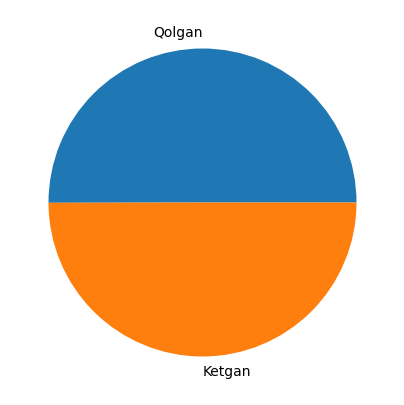

In [10]:
satisfaction_rate = df_100['satisfaction'].value_counts()/len(df_100)*100
plt.figure(figsize=(5,5))
plt.pie(satisfaction_rate, labels=['Qolgan','Ketgan'])
plt.show()

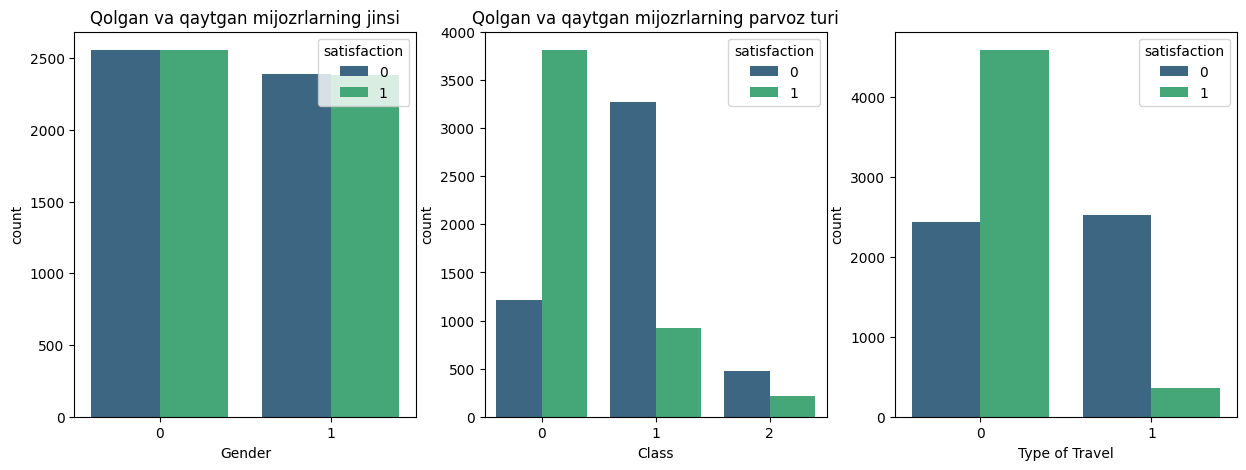

In [11]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='satisfaction', palette='viridis', data=df_100, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozrlarning jinsi")

sns.countplot(x='Class', hue='satisfaction', palette='viridis', data=df_100, ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozrlarning qaysi classda uchganligi")

sns.countplot(x='Type of Travel', hue='satisfaction', palette='viridis', data=df_100, ax=axes[2])
axes[1].set_title("Qolgan va qaytgan mijozrlarning parvoz turi")

plt.show()

In [12]:
X = df_100.drop(["satisfaction","id"], axis=1)
y = df_100['satisfaction']

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [15]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       990
           1       0.96      0.95      0.95       989

    accuracy                           0.96      1979
   macro avg       0.96      0.96      0.96      1979
weighted avg       0.96      0.96      0.96      1979

Model aniqligi: 0.9550277918140475


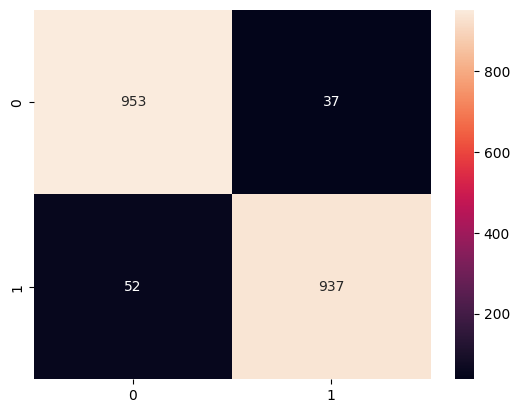

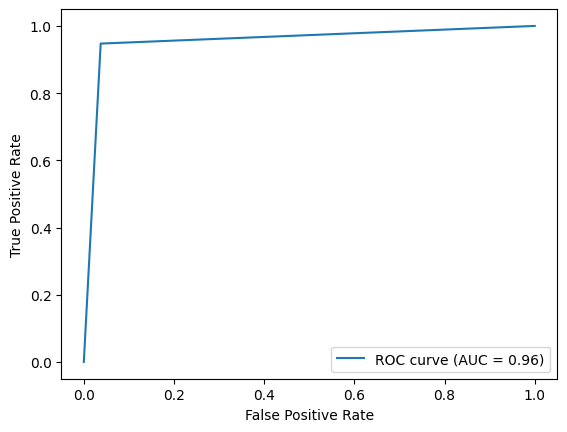

In [16]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [17]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4000 non-null   int64  
 1   Gender                             4000 non-null   object 
 2   Customer Type                      4000 non-null   object 
 3   Age                                4000 non-null   int64  
 4   Type of Travel                     4000 non-null   object 
 5   Class                              4000 non-null   object 
 6   Flight Distance                    4000 non-null   int64  
 7   Inflight wifi service              4000 non-null   int64  
 8   Departure/Arrival time convenient  4000 non-null   int64  
 9   Ease of Online booking             4000 non-null   int64  
 10  Gate location                      4000 non-null   int64  
 11  Food and drink                     4000 non-null   int64

In [18]:
test1 = test_set.ffill()
test_new = test1.drop("id", axis=1)

In [19]:
test_new['Gender'] = pd.Categorical(test_new['Gender']).codes
test_new['Customer Type'] = pd.Categorical(test_new['Customer Type']).codes
test_new['Type of Travel'] = pd.Categorical(test_new['Type of Travel']).codes
test_new['Class'] = pd.Categorical(test_new['Class']).codes

In [20]:
scaler = StandardScaler()
X_test = scaler.fit_transform(test_new)

In [21]:
yangi = xgb_model.predict(X_test)

In [22]:
sample.satisfaction = yangi

In [23]:
sample.to_csv("yana_bir_urinish.csv", index=False)